 <!DOCTYPE html>
<html>
<head>
  <title>ESI Drop_implementation</title>
</head>
<body>

<h1>Implementation of the dropout into the dataset</h1>
<p>Loading the normalized generated data and corresponding labels (normalized). Normalization of the data after the application of the dropout function. Saving the data.</p>


</body>
</html> 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import keras
%matplotlib inline

Num GPUs Available:  1


In [2]:
import matplotlib.pylab as plt
import numpy as np
import pickle
from tqdm import tqdm
import random

from matplotlib import image
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [3]:
T = np.load("data_Norm.npy")

T = np.reshape(T, [50, 80*109])



Labels = np.load('Label_Norm.npy', allow_pickle=True)


label50=[]
for i in tqdm(range (1)):
    label50=np.append(label50,Labels)
    

label50 = np.reshape(label50, [50, 10])    
print(label50.shape)
    
    
np.save("training_Label_Drop.npy", label50, allow_pickle=True)


100%|██████████| 1/1 [00:00<00:00, 3731.59it/s]

(50, 10)


In [4]:
target=T
#print(target)

from scipy.stats import poisson
from numpy import inf


#drop function
def drop(x,drp):
    layer = tf.keras.layers.Dropout(drp, input_shape=(2,))
    outputs = layer(x, training=True)
    outputs = outputs/(1/(1-drp)) #data normalization after dropout
    return outputs    

#noisytarget reflectivity values
dtarget = []
numberofimages = 50
noisyr =[]
for a in tqdm(range (numberofimages)):
    drp = random.uniform(0, 1)
    dropr = drop(target[a,:], drp)
    dtarget.append(dropr)
    
    
        

100%|██████████| 50/50 [00:00<00:00, 64.59it/s]


In [5]:
dtarget_a = np.array(dtarget)
dtarget_a = np.reshape(dtarget_a, [numberofimages,80,109])

np.save("training_data_Drop.npy", dtarget_a, allow_pickle=True)

/tmp/ipykernel_80267/2042752549.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(dtarget_a[10,:,:]))


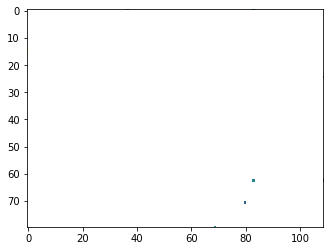

In [6]:
plt.imshow(np.log(dtarget_a[10,:,:]))